In [47]:
import numpy as np
import matplotlib.pyplot as plt
import random

## function defination

In [48]:
def get_column(data, index):
    return [row[index] for row in data]

In [49]:
def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',',
                         skip_header=1).tolist()
    X = [get_column(data, k) for k in range(3)]
    y = get_column(data, 3)
    return X, y

In [50]:
def predict(x, w, b):
    return sum([w_i * x_i for w_i, x_i in zip(w, x)]) + b

In [51]:
def compute_loss(y_hat, y, loss_type="mse"):
    if loss_type == "mae":
        return np.abs(y_hat - y)
    elif loss_type == "mse":
        return (y_hat - y) ** 2

In [52]:
def compute_gradient_wi(xi, y_hat, y):
    wi = 2*xi*(y_hat - y)
    return wi

In [53]:
def compute_gradient_b(y_hat, y):
    b = 2*(y_hat - y)
    return b

In [54]:
def update_weight(wi, dl_dwi, lr):
    w = wi - lr*dl_dwi
    return w

In [55]:
def update_bias(b, dl_db, lr):
    return b - lr*dl_db

In [56]:
def initialize_params():
    return [0.01699, 0.00708, -0.00231], 0

In [57]:
def implement_linear_regression(x_data, y_data, epoch_max=50, lr=1e-05):
    losses = []
    w, b = initialize_params()
    n = len(y_data)
    for _ in range(epoch_max):
        for i in range(n):
            x = [x_data[j][i] for j in range(len(x_data))]
            y = y_data[i]
            y_hat = predict(x, w, b)
            loss = compute_loss(y_hat, y, loss_type="mse")
            dl_dw = [compute_gradient_wi(xi, y_hat, y) for xi in x]
            dl_db = compute_gradient_b(y_hat, y)
            w = [update_weight(wi, dl_dwi, lr) for wi, dl_dwi in zip(w, dl_dw)]
            b = update_bias(b, dl_db, lr)
            losses.append(loss)
    return w, b, losses

## question

In [58]:
# question 01
X, y = prepare_data('advertising.csv')
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print('question 01:', list)

question 01: [624.1, 175.1, 300.5, 78.9]


In [59]:
# question 2
x_1 = [1, 1, 1]
w = [0, 0.5, 0]
y_hat = predict(x_1, w, b=0.5)
print('question 02:', y_hat)

question 02: 1.0


In [60]:

# question 3
loss = compute_loss(y_hat, 0.5, 'mse')
print('question 03:', loss)

question 03: 0.25


In [61]:

# question 3
dl_dwi = compute_gradient_wi(xi=1.0, y_hat=1.0, y=0.5)
print('question 04', dl_dwi)


question 04 1.0


In [62]:

# question 5
dl_db = compute_gradient_b(y_hat=0.5, y=2.0)
print('question 05', dl_db)

question 05 -3.0


In [63]:

# question 6
after_wi = update_weight(wi=1.0, dl_dwi=-0.5, lr=1e-5)
print('question 06', after_wi)

question 06 1.000005


In [64]:
# question 7
after_b = update_weight(wi=0.5, dl_dwi=-1, lr=1e-5)
print('question 07', after_b)

question 07 0.50001


In [65]:
# question 8
w, b, losses = implement_linear_regression(X, y)
print(f'question 08: w1 = {w[0]}, w2 = {w[1]}, w3 = {w[2]}')


question 08: w1 = 0.07405984067937156, w2 = 0.159173602674084, w3 = 0.017561197577810533


In [66]:
# question 9
x_2 = [19.2, 35.9, 51.3]
y_hat = predict(x_2, w, b)
print('question 09:', y_hat)

question 09: 8.176413318540153


In [67]:
# question 10
loss = compute_loss(y_hat=1, y=0.5, loss_type="mae")
print('question 10:', loss)

question 10: 0.5


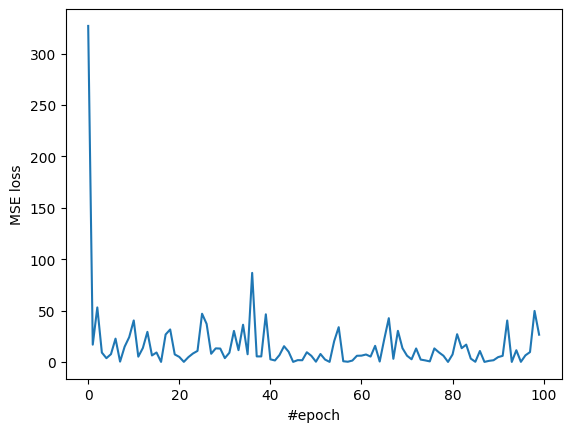

In [69]:
plt.plot(losses[:100])
plt.xlabel("#epoch")
plt.ylabel('MSE loss')
plt.show()